<a href="https://colab.research.google.com/github/Jair-RM/Modelacion-Financiera/blob/main/OC_SMF_EjemploRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal

<b>Oliver Cuate</b><br>
*14 de febrero de 2025*

Cargamos las bibliotecas que usaremos:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Cargamos los datos que usaremos:

In [ ]:
datos = pd.read_csv("Datos.csv")
type(datos)

pandas.core.frame.DataFrame

Mostramos los datos:

In [ ]:
datos

,Sexo,Estatura,Peso,Calzado
0,Mujer,1.65,65,5
1,Mujer,1.58,62,23
2,Hombre,1.72,61,6.5
3,Hombre,1.86,80,28.4
4,Hombre,1.78,57,25.5
5,Hombre,1.74,65,27.6
6,Mujer,1.59,57,3.5
7,Hombre,1.80,62.526.7,26.7
8,Mujer,1.61,56.5,24.2
9,Hombre,1.70,81,26.3


Filtramos los que registraron mal algún valor numérico:

In [ ]:
# Eliminamos los datos que no son números en las columnas Peso y Calzado
datos = datos[pd.to_numeric(datos['Peso'], errors='coerce').notnull()]
datos = datos[pd.to_numeric(datos['Calzado'], errors='coerce').notnull()]
datos

,Sexo,Estatura,Peso,Calzado
0,Mujer,1.65,65,5
1,Mujer,1.58,62,23
2,Hombre,1.72,61,6.5
3,Hombre,1.86,80,28.4
4,Hombre,1.78,57,25.5
5,Hombre,1.74,65,27.6
6,Mujer,1.59,57,3.5
8,Mujer,1.61,56.5,24.2
9,Hombre,1.70,81,26.3
10,Mujer,1.57,48.5,24.2


Mostramos los datos actualizados:

In [ ]:
# convierto a tipo numérico los datos de las columnas: Peso, Estatura y Calzado
datos['Peso'] = pd.to_numeric(datos['Peso'], errors = 'coerce')
datos['Estatura'] = pd.to_numeric(datos['Estatura'], errors = 'coerce')
datos['Calzado'] = pd.to_numeric(datos['Calzado'], errors = 'coerce')
datos

,Sexo,Estatura,Peso,Calzado
0,Mujer,1.65,65.0,5.0
1,Mujer,1.58,62.0,23.0
2,Hombre,1.72,61.0,6.5
3,Hombre,1.86,80.0,28.4
4,Hombre,1.78,57.0,25.5
5,Hombre,1.74,65.0,27.6
6,Mujer,1.59,57.0,3.5
8,Mujer,1.61,56.5,24.2
9,Hombre,1.70,81.0,26.3
10,Mujer,1.57,48.5,24.2


Agrupamos los datos según el sexo y mostramos la media de la estatura

In [ ]:
datosMH_E = datos['Estatura'].groupby(datos['Sexo'])
datosMH_E.mean()

Sexo
Hombre    1.739545
Mujer     1.580000
Name: Estatura, dtype: float64

Agrupamos los datos según el sexo y mostramos la media del peso

In [ ]:
datosMH_P = datos['Peso'].groupby(datos['Sexo'])
datosMH_P.mean()

Sexo
Hombre    69.786364
Mujer     54.642857
Name: Peso, dtype: float64

Agrupamos los datos según el sexo y mostramos la media del calzado

In [ ]:
datosMH_C = datos['Calzado'].groupby(datos['Sexo'])
datosMH_C.mean()

Sexo
Hombre    24.118182
Mujer     16.907143
Name: Calzado, dtype: float64

Graficamos los datos según el sexo, la estatura siempre corresponderá al eje x, el eje y será peso o calzado

In [ ]:
# Agrupación
xh = datos.loc[datos['Sexo'] == 'Hombre']
xm = datos.loc[datos['Sexo'] == 'Mujer']

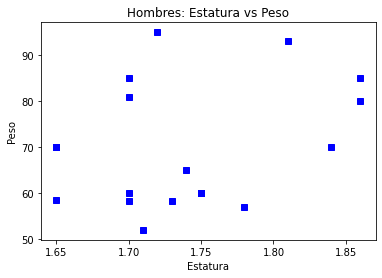

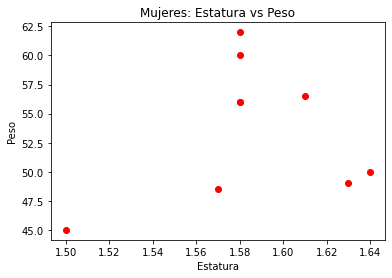

In [ ]:
plt.plot(xh.iloc[:,1].values, xh.iloc[:,2].values, 'sb')
plt.title('Hombres: Estatura vs Peso')
plt.xlabel('Estatura')
plt.ylabel('Peso')
plt.show()

print()

plt.plot(xm.iloc[:,1].values, xm.iloc[:,2].values, 'or')
plt.title('Mujeres: Estatura vs Peso')
plt.xlabel('Estatura')
plt.ylabel('Peso')
plt.show()

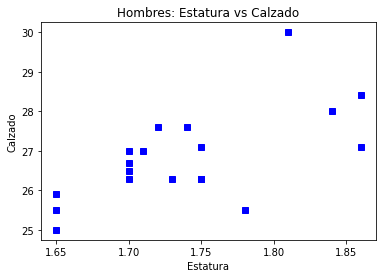

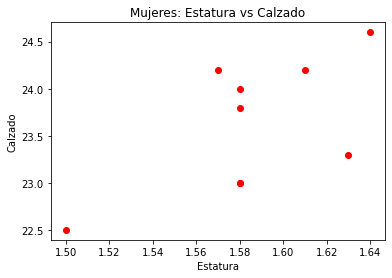

In [ ]:
plt.plot(xh.iloc[:,1].values, xh.iloc[:,3].values, 'sb')
plt.title('Hombres: Estatura vs Calzado')
plt.xlabel('Estatura')
plt.ylabel('Calzado')
plt.show()

print()

plt.plot(xm.iloc[:,1].values, xm.iloc[:,3].values, 'or')
plt.title('Mujeres: Estatura vs Calzado')
plt.xlabel('Estatura')
plt.ylabel('Calzado')
plt.show()

Hacemos un nuevo fitro, para los que pusieron su calzado mal

In [ ]:
datos = datos[datos['Calzado']>15.0]
datos

,Sexo,Estatura,Peso,Calzado
1,Mujer,1.58,62.0,23.0
3,Hombre,1.86,80.0,28.4
4,Hombre,1.78,57.0,25.5
5,Hombre,1.74,65.0,27.6
8,Mujer,1.61,56.5,24.2
9,Hombre,1.70,81.0,26.3
10,Mujer,1.57,48.5,24.2
11,Hombre,1.70,85.0,26.7
12,Hombre,1.70,58.3,27.0
13,Hombre,1.75,60.0,26.3


Graficamos los datos finales juntos

In [ ]:
# Nueva Agrupación
xh = datos.loc[datos['Sexo'] == 'Hombre']
xm = datos.loc[datos['Sexo'] == 'Mujer']

xm

,Sexo,Estatura,Peso,Calzado
1,Mujer,1.58,62.0,23.0
8,Mujer,1.61,56.5,24.2
10,Mujer,1.57,48.5,24.2
16,Mujer,1.50,45.0,22.5
19,Mujer,1.58,56.0,23.8
21,Mujer,1.58,60.0,24.0
24,Mujer,1.58,56.0,23.0
26,Mujer,1.64,50.0,24.6
30,Mujer,1.63,49.0,23.3


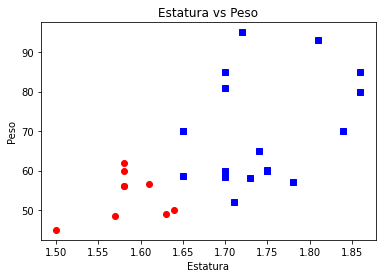

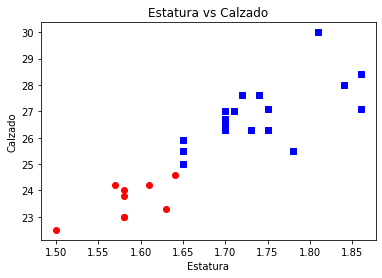

In [ ]:
# Grafica
plt.plot(xh.iloc[:,1].values, xh.iloc[:,2].values, 'sb')
plt.plot(xm.iloc[:,1].values, xm.iloc[:,2].values, 'or')
plt.title('Estatura vs Peso')
plt.xlabel('Estatura')
plt.ylabel('Peso')
plt.show()

print()

plt.plot(xh.iloc[:,1].values, xh.iloc[:,3].values, 'sb')
plt.plot(xm.iloc[:,1].values, xm.iloc[:,3].values, 'or')
plt.title('Estatura vs Calzado')
plt.xlabel('Estatura')
plt.ylabel('Calzado')
plt.show()

Hacemos la regresión lineal

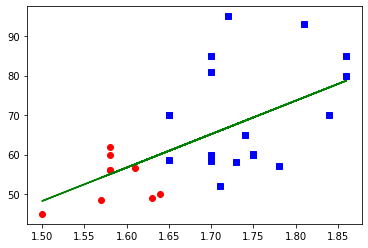

In [ ]:
regresion = LinearRegression()  # constructor por defecto de la clase LinearRegression
X = datos.iloc[:,1].values.reshape(-1, 1)
Y = datos.iloc[:,2].values.reshape(-1, 1)
regresion.fit(X, Y)  # realizamos la regresión
pred = regresion.predict(X)  # se hacen predicciones

# Graficamos
plt.plot(xh.iloc[:,1].values, xh.iloc[:,2].values, 'sb')
plt.plot(xm.iloc[:,1].values, xm.iloc[:,2].values, 'or')
plt.plot(datos.iloc[:,1].values, pred, 'g')
plt.show()

In [ ]:
val = regresion.predict(np.array([2.0]).reshape(-1, 1))
print(val)

[[90.56766917]]


In [ ]:
datosMH_C = datos['Calzado'].groupby(datos['Sexo'])
datosMH_C.mean()

Sexo
Hombre    26.847368
Mujer     23.622222
Name: Calzado, dtype: float64

In [ ]:
datosMH_P = datos['Peso'].groupby(datos['Sexo'])
datosMH_P.mean()

Sexo
Hombre    69.384211
Mujer     53.666667
Name: Peso, dtype: float64

In [ ]:
datosMH_E = datos['Estatura'].groupby(datos['Sexo'])
datosMH_E.mean()

Sexo
Hombre    1.739474
Mujer     1.585556
Name: Estatura, dtype: float64